In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
clustering_data = pd.read_csv('loan.csv')
clustering_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
clustering_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
clustering_data.dropna(inplace=True)
clustering_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
clustering_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Text(0, 0.5, 'LoanAmount(In Thousands)')

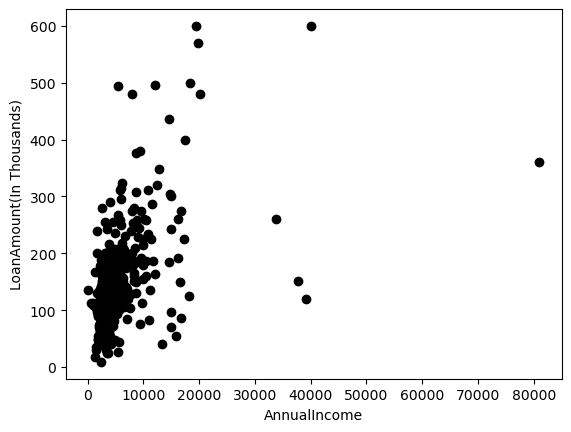

In [13]:
#For this article, we will be taking only two variables from the data 
# – “LoanAmount” and “ApplicantIncome.” 
# This will make it easy to visualize the steps as well. 
# Let’s pick these two variables and visualize the data points:

X = clustering_data[['LoanAmount','ApplicantIncome']]

plt.scatter(X['ApplicantIncome'],X['LoanAmount'],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('LoanAmount(In Thousands)')

In [14]:
from sklearn.cluster import KMeans

In [15]:
data = clustering_data.drop('Loan_ID',axis=1)
data.shape

(480, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [17]:
data.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [18]:
data.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [19]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
data.Dependents = data.Dependents.str.replace("+", " ").astype('int')

In [21]:
data.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [22]:
data.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [23]:
data.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [24]:
data.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [25]:
data.Property_Area = data.Property_Area.apply(lambda x : "Urban" if x =='Semiurban' else x)

In [26]:
data.Property_Area.value_counts()

Urban    341
Rural    139
Name: Property_Area, dtype: int64

In [27]:
data.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 46.9+ KB


In [41]:
encoded = pd.get_dummies(data)
encoded


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,1,0,1
5,2,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,1
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1


In [42]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2)

# fitting the k means algorithm on scaled data
kmeans.fit(encoded)

KMeans(n_clusters=2)

# INERTIA on the fitted data

In [43]:
kmeans.inertia_

10190745161.38854

We got an inertia value of almost 1600+. Now, let’s see how we can use the elbow method to determine the optimum number of clusters in Python.

We will first fit multiple k-means models, and in each successive model, we will increase the number of clusters.

We will store the inertia value of each model and then plot it to visualize the result

In [45]:
# fitting multiple k-means algorithms and storing the values in an empty list
wcss = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(encoded)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Intertia')

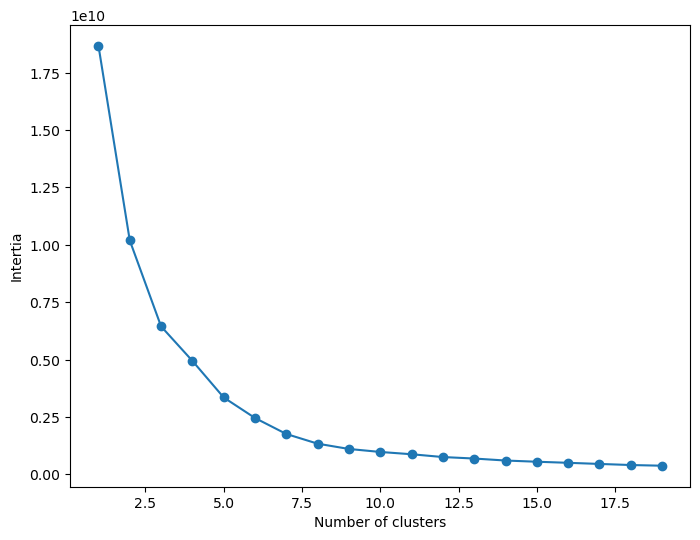

In [46]:
#converting the result into a dataframe and plotting them

frame = pd.DataFrame({"Cluster": range(1,20), 'wcss':wcss })
plt.figure(figsize=(8,6))
plt.plot(frame['Cluster'], frame['wcss'], marker='o' )
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8.

Set the number of clusters as 5 and fit the model.

In [47]:
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(encoded)
pred = kmeans.predict(encoded)

In [48]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
clustered = pd.DataFrame(encoded)
clustered['cluster'] = pred
clustered['cluster'].value_counts()

0    400
1     72
2      5
3      3
Name: cluster, dtype: int64

In [51]:
clustered

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,cluster
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0,1,0
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,1,0,1,0
5,2,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,1,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,1


In [58]:
data['Clusters'] = pred
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [59]:
data[data['Clusters']==0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y,0
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0


In [60]:
groups = data.groupby('Clusters')


In [61]:
C0 = groups.get_group(0)
C1 = groups.get_group(1)
C2 = groups.get_group(2)
C3 = groups.get_group(3)

In [62]:
C3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Urban,Y,3
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,3
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,3


In [63]:
C1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Urban,N,1
20,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,1
25,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Urban,Y,1
34,Male,No,3,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,1
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y,1
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y,1
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Urban,Y,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1


In [64]:
C2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
155,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Urban,Y,2
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Urban,N,2
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Urban,Y,2
409,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,2
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Urban,Y,2


In [65]:
C0

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Clusters
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y,0
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0


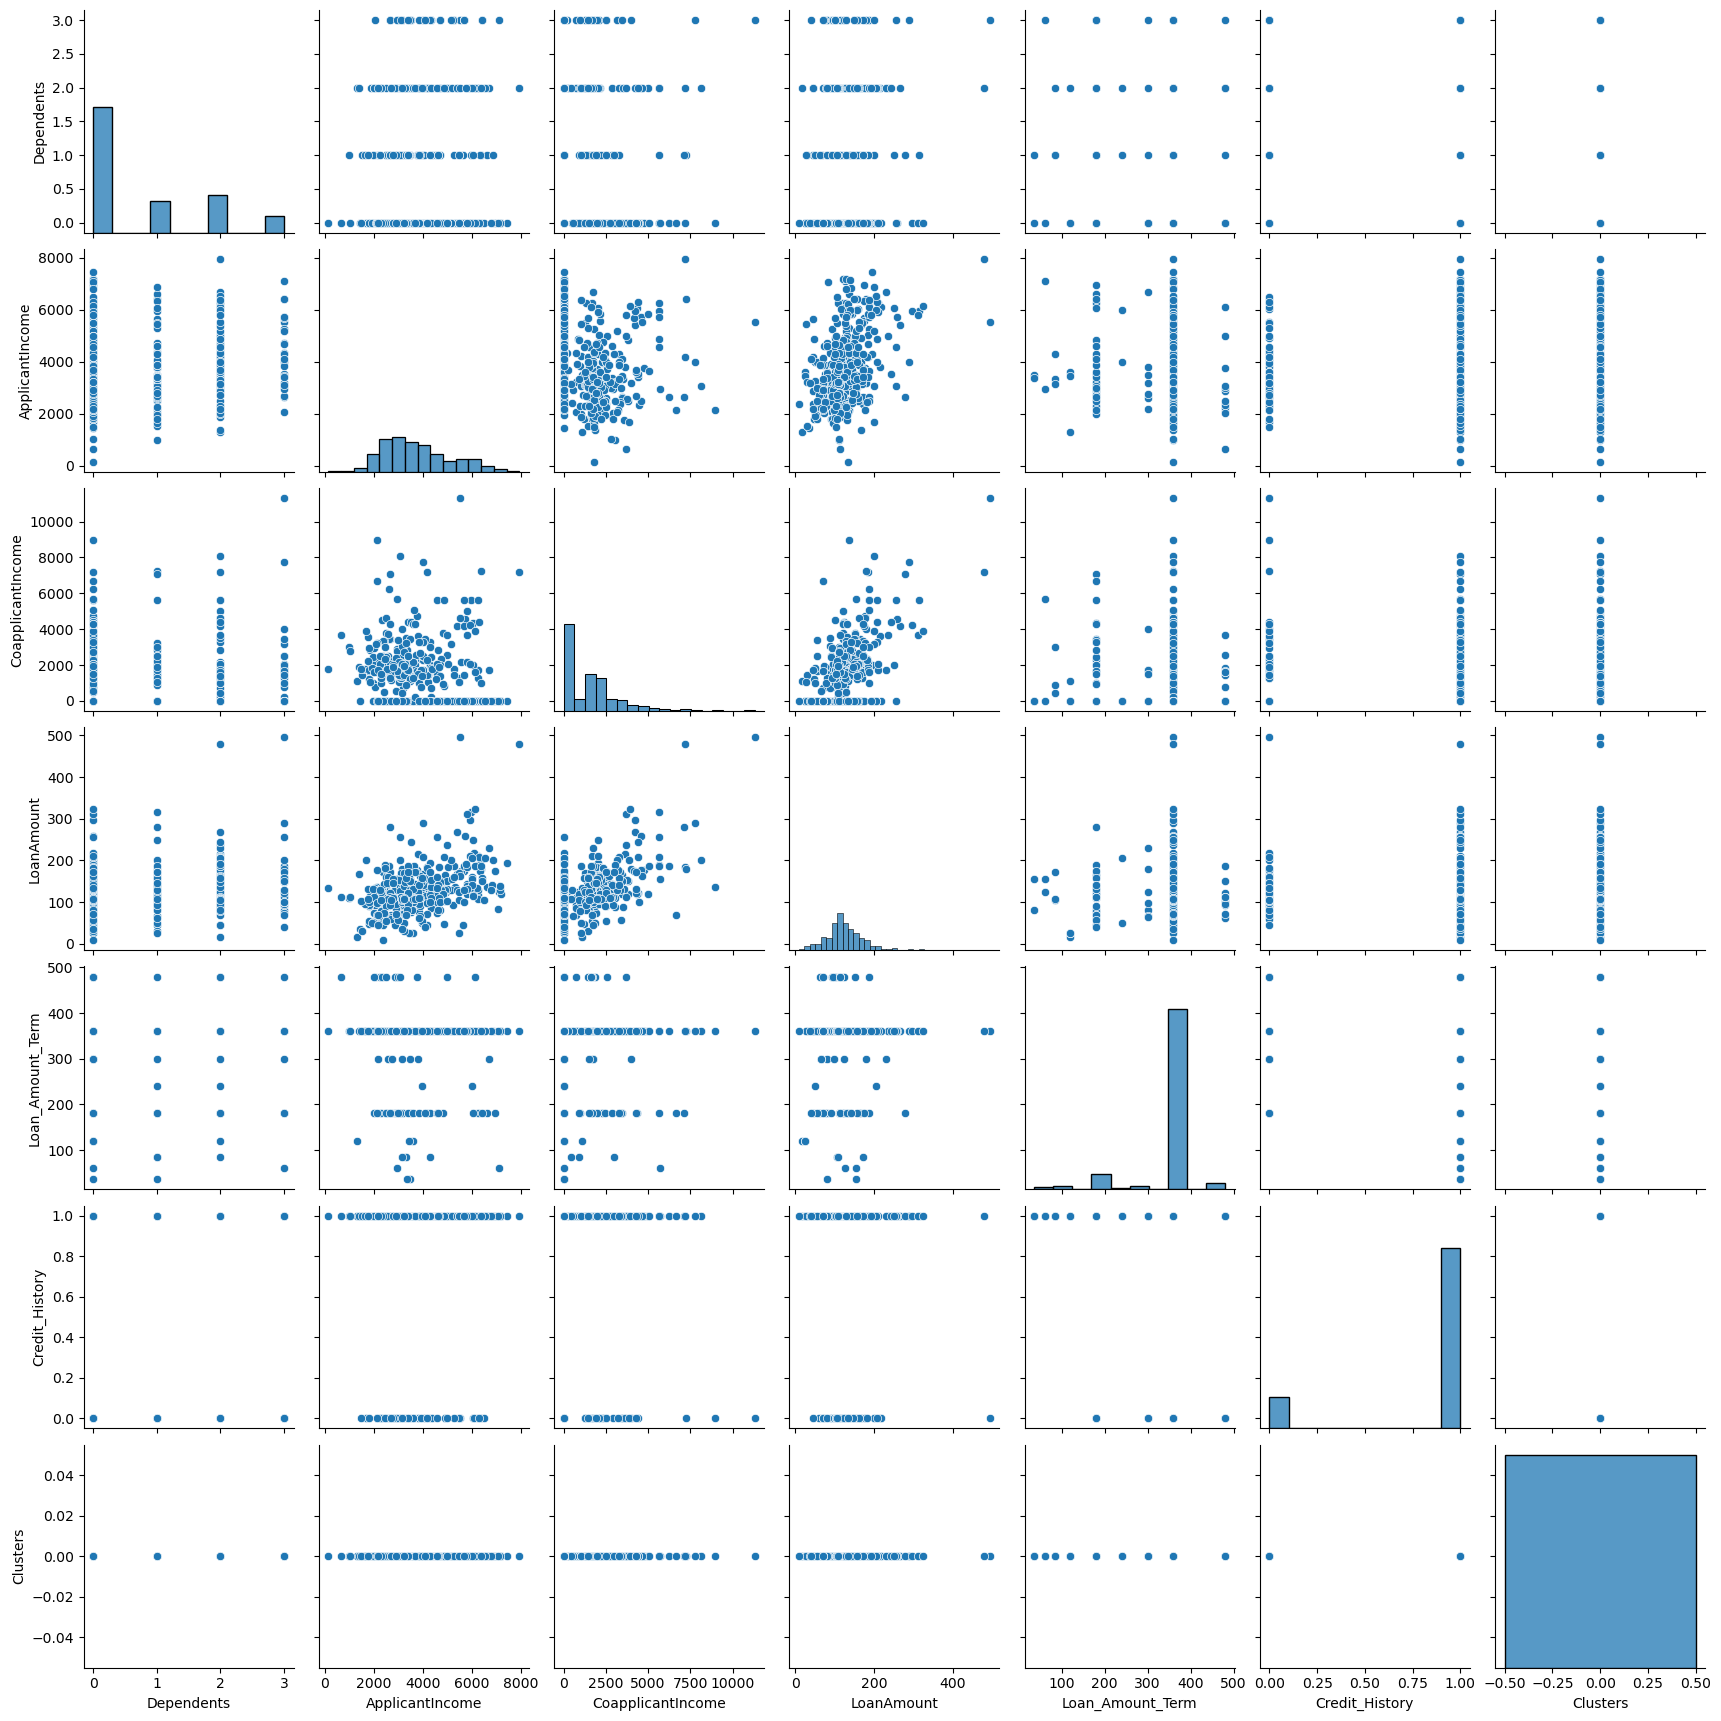

In [66]:
import seaborn as sns
sns.pairplot(C0)

# Conclusion

In this article, we discussed one of the most famous clustering algorithms – K-Means. We implemented it from scratch and looked at its step-by-step implementation. We looked at the challenges we might face while working with K-Means and also saw how K-Means++ can be helpful when initializing the cluster centroids.

Finally, we implemented k-means and looked at the elbow method, which helps to find the optimum number of clusters in the K-Means algorithm.